## Conditional Probability

Conditional probability is the probability of an event occurring given that another event has occurred. It is denoted by `P(A|B)`, which represents the probability of event `A` occurring given that event `B` has occurred.

The formula for conditional probability is:

\begin{equation}
P(A|B) = \frac{P(A and B)}{P(B)}
\end{equation}

where `P(A and B)` is the probability of both events `A` and `B` occurring together, and `P(B)` is the probability of event `B` occurring.



Conditional probability is an important concept in probability theory and is used in many real-world applications, such as predicting the likelihood of a disease given certain symptoms, or the probability of a customer buying a product given their demographic information.

`Example:` A bag contains 5 red balls and 3 green balls. If a ball is randomly selected from the bag and it is known to be red, what is the probability that it was one of the first two balls drawn from the bag?

`Solution:` Let `A` be the event that the ball was one of the first two balls drawn from the bag, and let `B` be the event that the ball is red. We want to find `P(A|B)`.

The probability of event `A` is 

\begin{equation}
P(A) = 2/8 * 1/7 + 6/8 * 2/7 = 10/28
\end{equation}

The probability of event `B` is

\begin{equation}
P(B) = 5/8
\end{equation}

The probability of both events `A and B` occurring together is

\begin{equation}
P(A and B) = 2/8 * 1/7 = 1/28
\end{equation}

Therefore, the conditional probability of `A` given `B` is:

\begin{equation}
P(A|B) = \frac{P(A and B)}{P(B)} = \frac{(1/28)}{(5/8)} = 0.057
\end{equation}

So the probability that the ball was one of the first two balls drawn from the bag, given that it is red, is `0.057`.

## Baye's Theorem

Bayes' theorem is a formula in probability theory that describes the probability of an event occurring based on prior knowledge or information. It is named after Reverend Thomas Bayes, who first formulated it.

The theorem states that:

\begin{equation}
P(A|B) = P(B|A) * \frac{P(A)}{P(B)}
\end{equation}

where:

- `P(A|B)` is the probability of event `A` occurring given that event `B` has occurred.
- `P(B|A)` is the probability of event `B` occurring given that event `A` has occurred.
- `P(A)` is the prior probability of event `A` occurring.
- `P(B)` is the prior probability of event `B` occurring.


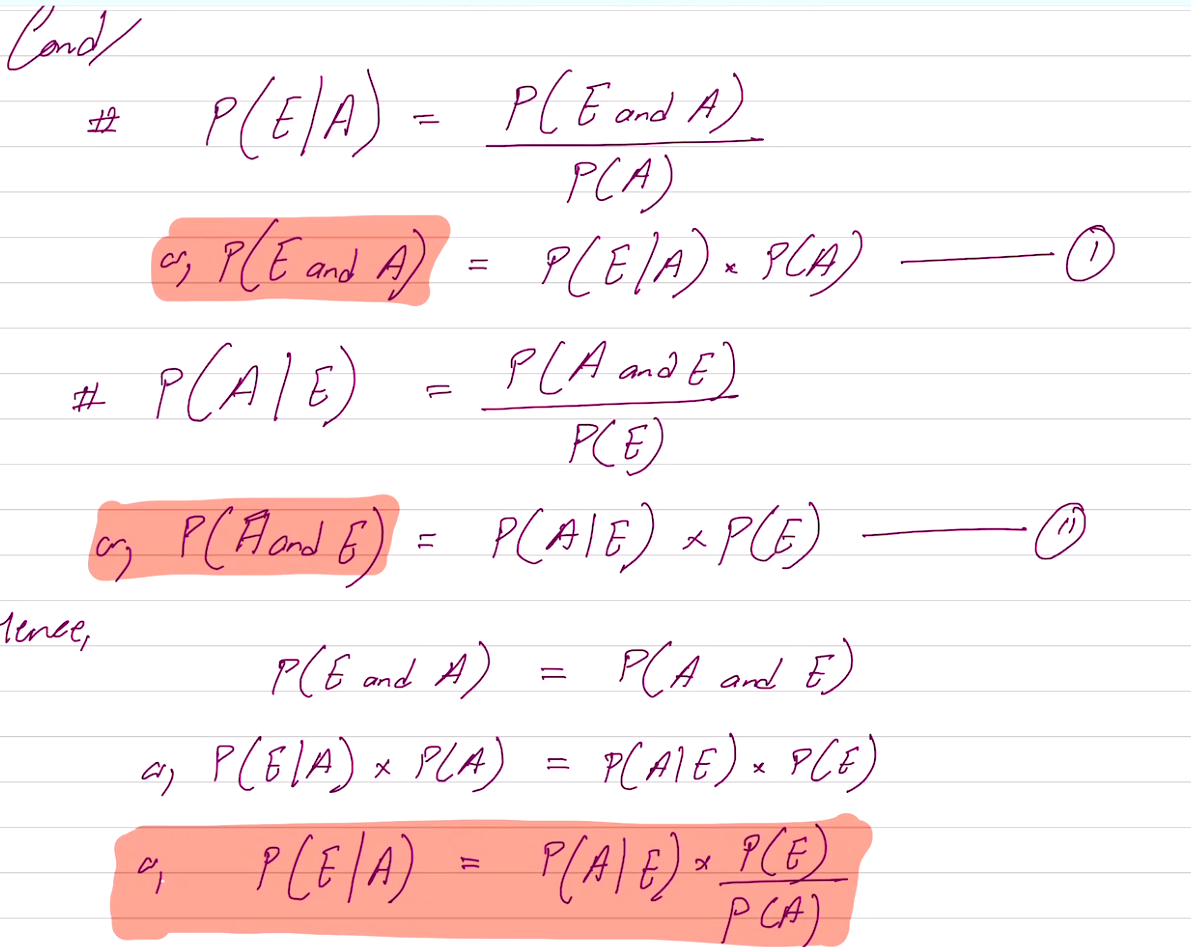

## Assumption of Naive Bayes
- Feature independence: The features of the data are conditionally independent of each other, given the class label.
- Continuous features are normally distributed: If a feature is continuous, then it is assumed to be normally distributed within each class.
- Discrete features have multinomial distributions: If a feature is discrete, then it is assumed to have a multinomial distribution within each class.
- Features are equally important: All features are assumed to contribute equally to the prediction of the class label.
- No missing data: The data should not contain any missing values.

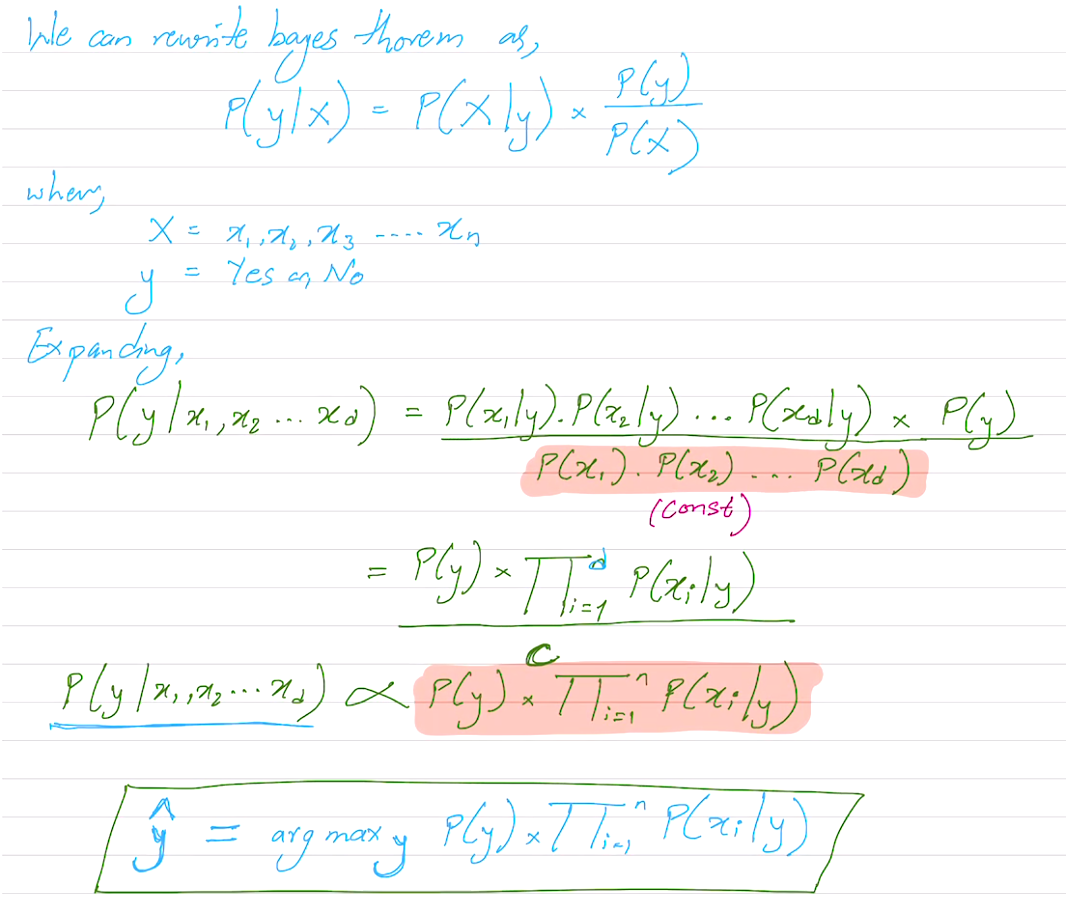

## CODE

https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/

In [1]:
import pandas as pd
data = {
    "Outlook": ["Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Sunny", "Rainy", "Overcast", "Overcast", "Sunny"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    "Play Golf": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}
df = pd.DataFrame(data)

df.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [2]:
# Lable Encoding

from sklearn.preprocessing import LabelEncoder

encoded_df = pd.DataFrame()

for each in df.columns:
    encoder = LabelEncoder()
    encoded_df[each] = encoder.fit_transform(df[each])

    print(f"For {each} : {encoder.classes_} -> {list(range(0, len(encoder.classes_)))}")

For Outlook : ['Overcast' 'Rainy' 'Sunny'] -> [0, 1, 2]
For Temperature : ['Cool' 'Hot' 'Mild'] -> [0, 1, 2]
For Humidity : ['High' 'Normal'] -> [0, 1]
For Windy : [False  True] -> [0, 1]
For Play Golf : ['No' 'Yes'] -> [0, 1]


In [3]:
encoded_df.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [4]:
X = encoded_df.drop("Play Golf", axis=1).to_numpy()
Y = encoded_df["Play Golf"].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=999
)

In [7]:
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

,"alpha alpha: float, default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"min_categories min_categories: int or array-like of shape (n_features,), default=NoneMinimum number of categories per feature.- integer: Sets the minimum number of categories per feature to `n_categories` for each features.- array-like: shape (n_features,) where `n_categories[i]` holds the minimum number of categories for the ith column of the input.- None (default): Determines the number of categories automatically from the training data... versionadded:: 0.24",None


In [8]:
classifier.predict_proba([[2,1,1,0]])

array([[0.25917927, 0.74082073]])

In [9]:
classifier.score(X_test, y_test)

0.6666666666666666